In [1]:
# List common data folders and show their sizes
from pathlib import Path
candidates = [Path('mycar/data'), Path('data'), Path('mycar/models'), Path('mycar/logs')]
for p in candidates:
    if p.exists():
        print(p, 'exists — items:', len(list(p.iterdir())))
    else:
        print(p, 'not found')

mycar/data not found
data not found
mycar/models not found
mycar/logs not found


## Create a small placeholder recording
The snippet below creates a small CSV in `notebooks/sample_data` so you can test reading/visualization logic without having real camera data. It will also copy the sample image into the folder so visualization notebooks show results immediately.

In [ ]:
from pathlib import Path
import random, csv, shutil
out = Path('sample_data')
out.mkdir(parents=True, exist_ok=True)
csv_path = out / 'sample_record.csv'
# create 200 synthetic records (timestamp, steering [-1..1], throttle [0..1])
with csv_path.open('w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['timestamp','steering','throttle'])
    for t in range(200):
        steering = round(random.uniform(-1,1), 3)
        throttle = round(max(0, random.gauss(0.5,0.2)), 3)
        writer.writerow([t, steering, throttle])
print('Wrote', csv_path)
# copy sample image if present
src_img = Path('sample_data/sample_image.png')
if not src_img.exists():
    # try to find any image in repo and copy it
    repo_img = next(Path('.').rglob('*.png'), None)
    if repo_img:
        shutil.copy(repo_img, src_img)
        print('Copied', repo_img, 'to', src_img)
    else:
        print('No sample image found to copy; create one with create_sample_image.py')

Wrote /app/notebooks/sample_data/sample_record.csv


Rows: 200
   timestamp  steering  throttle
0          0     0.125     0.478
1          1     0.900     0.649
2          2     0.833     0.528
3          3     0.987     0.598
4          4    -0.632     0.854
         steering    throttle
count  200.000000  200.000000
mean     0.018720    0.520690
std      0.565861    0.185792
min     -0.994000    0.016000
25%     -0.458000    0.402000
50%      0.041500    0.514000
75%      0.477500    0.649250
max      0.989000    1.180000


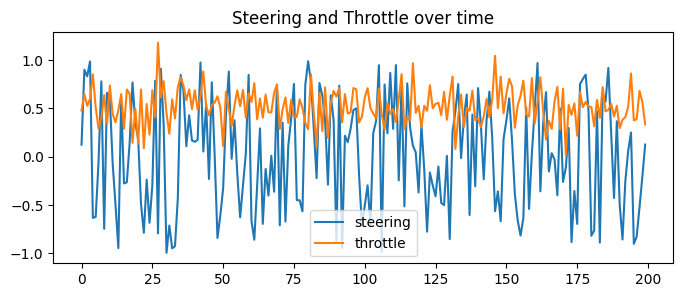

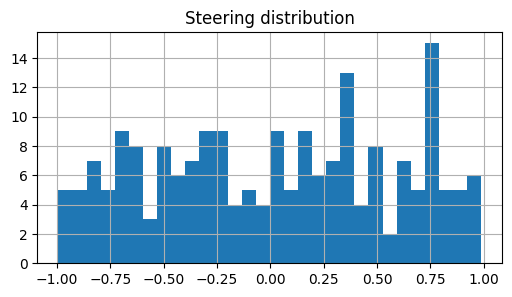

Data capture tests passed.


In [ ]:
# Test: read the CSV, validate schema, and show basic plots
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
csv_path = Path('sample_data/sample_record.csv')
assert csv_path.exists(), f'CSV not found: {csv_path}'
df = pd.read_csv(csv_path)
print('Rows:', len(df))
print(df.head())
# validate columns
expected = ['timestamp','steering','throttle']
assert list(df.columns) == expected, 'Unexpected CSV columns: ' + str(list(df.columns))
# basic stats and plots
print(df[['steering','throttle']].describe())
plt.figure(figsize=(8,3))
plt.plot(df['timestamp'], df['steering'], label='steering')
plt.plot(df['timestamp'], df['throttle'], label='throttle')
plt.legend()
plt.title('Steering and Throttle over time')
plt.show()
plt.figure(figsize=(6,3))
df['steering'].hist(bins=30)
plt.title('Steering distribution')
plt.show()
print('Data capture tests passed.')